In [1]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00
time: 398 µs (started: 2023-05-11 19:39:54 +00:00)


In [2]:
!pip install -U -q PyDrive

time: 5.03 s (started: 2023-05-11 19:40:20 +00:00)


In [3]:
!pip install permetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 6.35 s (started: 2023-05-11 19:40:27 +00:00)


In [4]:
!pip install sklearn-evaluation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.6 MB/s eta 0:00:00
time: 13.1 s (started: 2023-05-11 19:40:36 +00:00)


In [5]:
!pip list
!cat /etc/*-release
!python --version
!lscpu
!free -m

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
backoff                       2.2.1
beautifulsoup4                4.11.2
black                         23.3.0
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build

In [6]:
from google.colab import auth
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
from pydrive.drive import GoogleDrive
from scipy.io import loadmat
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from permetrics.classification import ClassificationMetric
from sklearn_evaluation import plot
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded1 = drive.CreateFile({'id':'1h35Iv1pgqAnAV7lUywEZq-P3O4VLj9Q3'})
downloaded1.GetContentFile('mnist-original.mat')
mnist_path = "mnist-original.mat"
mnist_raw = loadmat(mnist_path)
mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
        }
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)
pd.set_option('display.expand_frame_repr', True)

time: 31.8 s (started: 2023-05-11 19:41:00 +00:00)


In [7]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

time: 5.06 ms (started: 2023-05-11 19:41:39 +00:00)


In [8]:
X, y = mnist["data"], mnist["target"]

time: 516 µs (started: 2023-05-11 19:41:43 +00:00)


In [9]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252,165,0,0,0,0,0,0,0,0,0,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,198,253,190,0,0,0

time: 457 ms (started: 2023-05-11 19:41:46 +00:00)


In [10]:
pd.DataFrame(y)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


time: 13.4 ms (started: 2023-05-11 19:41:52 +00:00)


In [14]:
pca = PCA(n_components=X.shape[1])  

X_normalized = X / 255.0
pca.fit(X_normalized)  
explained_variance_ratio = pca.explained_variance_ratio_ 

variance_sum = 0.0
n_components = 0
for ratio in explained_variance_ratio:
    variance_sum += ratio
    n_components += 1
    if variance_sum >= 0.95:
        break

print("Minimum number of components required to retain at least 95% of the variance:", n_components)

Minimum number of components required to retain at least 95% of the variance: 154
time: 12.9 s (started: 2023-05-11 19:53:30 +00:00)


0.98818
0.94053
0.94035
0.94039


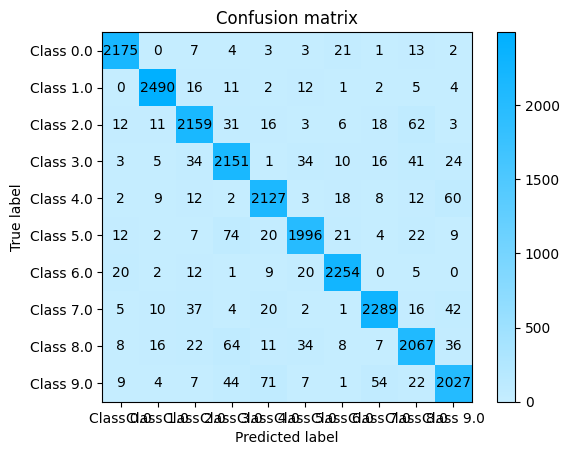

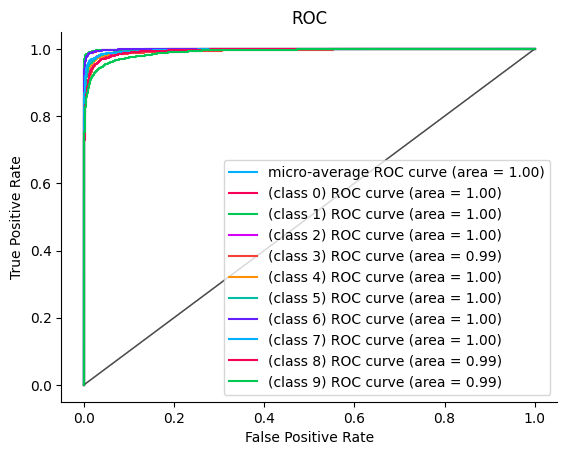

time: 1min 18s (started: 2023-05-11 19:56:15 +00:00)


In [16]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn_evaluation import plot, table
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pca = PCA(n_components=154)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

rf.fit(X_train_pca, y_train)

y_pred = rf.predict(X_test_pca)

report = ClassificationMetric(y_test, y_pred, decimal = 5)
print(report.AS(average="macro"))
print(report.PS(average="macro"))
print(report.RS(average="macro"))
print(report.f1s(average="macro"))

cm = plot.ConfusionMatrix.from_raw_data(y_test, y_pred)
print(cm)

forest_score = rf.predict_proba(X_test_pca)
Roc_plot = plot.ROC.from_raw_data(y_test,forest_score)
print(Roc_plot)